In [1]:
# Importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading the CSV file into a variable
pokemon = pd.read_csv("/Users/siddhant/Desktop/MSU/Machine Learning/ML Project/Pokemon Data.csv")
pokemon.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
# Coverting the dataset into a DataFrame
df_poke = pd.DataFrame(pokemon)
df_poke.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [4]:
# Checking the number of rows and columns in our DataFrame
df_poke.shape

(721, 23)

In [5]:
# Checking all the null values and taking the sum of it
df_poke.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [6]:
# Dropping unwanted columns i.e., Type_2 and Egg_Group_2
updated_poke = df_poke.drop(['Type_2','Egg_Group_2'],axis = 1)

In [7]:
# Verifying the results
updated_poke.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [8]:
# Taking the value count for the Pr_Male Column
updated_poke['Pr_Male'].value_counts()

0.500    458
0.875    101
0.000     23
0.250     22
1.000     19
0.750     19
0.125      2
Name: Pr_Male, dtype: int64

In [9]:
# Filling the null values with the mode value of 0.500
updated_poke['Pr_Male'].fillna(0.500,inplace = True)

In [10]:
# Checking null values for the column Pr_Male
updated_poke['Pr_Male'].isnull().sum()

0

In [11]:
# Checking the value count for the Pr_Male column
updated_poke['Pr_Male'].value_counts()

0.500    535
0.875    101
0.000     23
0.250     22
1.000     19
0.750     19
0.125      2
Name: Pr_Male, dtype: int64

In [12]:
# Using describe method to check the distribution of the data
updated_poke.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.547677,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.189693,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<AxesSubplot:>

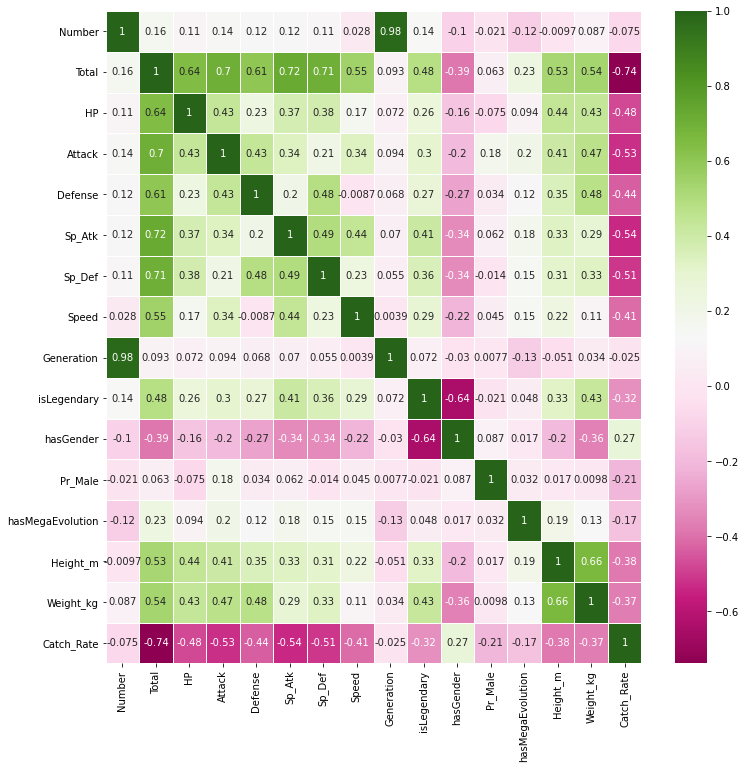

In [13]:
# Plotting a heatmap using seaborn
plt.figure(figsize = (12,12))
sns.heatmap(updated_poke.corr(),annot = True,cmap = 'PiYG',linewidths = 0.5)

In [14]:
# Checking the Type_1 value count
updated_poke['Type_1'].value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Psychic      47
Fire         47
Rock         41
Electric     36
Ground       30
Dark         28
Poison       28
Fighting     25
Dragon       24
Ice          23
Ghost        23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

In [15]:
# Checking the Generation value count
updated_poke['Generation'].value_counts()

5    156
1    151
3    135
4    107
2    100
6     72
Name: Generation, dtype: int64

In [16]:
# Checking the Color value count
updated_poke['Color'].value_counts()

Blue      134
Brown     110
Green      79
Red        75
Grey       69
Purple     65
Yellow     64
White      52
Pink       41
Black      32
Name: Color, dtype: int64

In [17]:
# Checking the Egg_Group_1 value count
updated_poke['Egg_Group_1'].value_counts()

Field           169
Water_1          74
Monster          74
Undiscovered     73
Bug              66
Mineral          46
Flying           44
Amorphous        41
Human-Like       37
Fairy            30
Grass            27
Water_2          15
Water_3          14
Dragon           10
Ditto             1
Name: Egg_Group_1, dtype: int64

In [18]:
# Checking the Body_style value count
updated_poke['Body_Style'].value_counts()

bipedal_tailed      158
quadruped           135
bipedal_tailless    109
two_wings            63
head_arms            39
head_only            34
with_fins            31
insectoid            30
head_base            30
serpentine_body      29
four_wings           18
head_legs            17
multiple_bodies      15
several_limbs        13
Name: Body_Style, dtype: int64

# Feature Engineering

In [19]:
# Selecting a primary type for Pokemons
primary_type = updated_poke.replace(['Water', 'Ice'], 'Water')
primary_type = primary_type.replace(['Grass', 'Bug'], 'Grass')
primary_type = primary_type.replace(['Ground', 'Rock'], 'Rock')
primary_type = primary_type.replace(['Psychic', 'Dark', 'Ghost', 'Fairy'], 'Dark')
primary_type = primary_type.replace(['Electric', 'Steel'], 'Electric')

primary_type['Type_1'].value_counts()

Grass       129
Water       128
Dark        115
Normal       93
Rock         71
Electric     58
Fire         47
Poison       28
Fighting     25
Dragon       24
Flying        3
Name: Type_1, dtype: int64

In [20]:
# Verifying the results
primary_type.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [21]:
# Creating a dictionary to replace New_Body_Style values with Body_Style values
poke_dict = dict(primary_type['Body_Style'].value_counts())

primary_type['New_Body_Style'] = primary_type['Body_Style'].map(poke_dict)

In [22]:
# Checking the 'New_Body_Style' column
primary_type['New_Body_Style'].head()

0    135
1    135
2    135
3    158
4    158
Name: New_Body_Style, dtype: int64

In [23]:
# Checking the 'Body_Style' column
primary_type['Body_Style'].head()

0         quadruped
1         quadruped
2         quadruped
3    bipedal_tailed
4    bipedal_tailed
Name: Body_Style, dtype: object

In [24]:
# Concating primary_type, pk_type and pk_color data
pk_types = pd.get_dummies(primary_type['Type_1'])
pk_color = pd.get_dummies(primary_type['Color'])

X = pd.concat([primary_type, pk_types],axis = 1)
X = pd.concat([X, pk_color],axis = 1)

X.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,...,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,...,0,0,0,1,0,0,0,0,0,0
2,3,Venusaur,Grass,525,80,82,83,100,100,80,...,0,0,0,1,0,0,0,0,0,0
3,4,Charmander,Fire,309,39,52,43,60,50,65,...,0,0,0,0,0,0,0,1,0,0
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Checking all the columns
X.columns

Index(['Number', 'Name', 'Type_1', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color',
       'hasGender', 'Pr_Male', 'Egg_Group_1', 'hasMegaEvolution', 'Height_m',
       'Weight_kg', 'Catch_Rate', 'Body_Style', 'New_Body_Style', 'Dark',
       'Dragon', 'Electric', 'Fighting', 'Fire', 'Flying', 'Grass', 'Normal',
       'Poison', 'Rock', 'Water', 'Black', 'Blue', 'Brown', 'Green', 'Grey',
       'Pink', 'Purple', 'Red', 'White', 'Yellow'],
      dtype='object')

In [26]:
# Dropping unnecessary 
# columns
X2 = X.drop(['Number', 'Name', 'Type_1', 'Color', 'Egg_Group_1'], axis = 1)
X2.shape

(721, 38)

In [27]:
# Selecting the target column and placing it into a variable Y
y = X2['isLegendary']
# Creating a X_main variable to have a dataset without target column
X_main = X2.drop(['isLegendary', 'Body_Style'], axis = 1)

In [28]:
# Checking all the columns
X_main.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'hasGender', 'Pr_Male', 'hasMegaEvolution', 'Height_m',
       'Weight_kg', 'Catch_Rate', 'New_Body_Style', 'Dark', 'Dragon',
       'Electric', 'Fighting', 'Fire', 'Flying', 'Grass', 'Normal', 'Poison',
       'Rock', 'Water', 'Black', 'Blue', 'Brown', 'Green', 'Grey', 'Pink',
       'Purple', 'Red', 'White', 'Yellow'],
      dtype='object')

In [29]:
# Verifying the results
X_main.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Pr_Male,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,318,45,49,49,65,65,45,1,True,0.875,...,0,0,0,1,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,True,0.875,...,0,0,0,1,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,True,0.875,...,0,0,0,1,0,0,0,0,0,0
3,309,39,52,43,60,50,65,1,True,0.875,...,0,0,0,0,0,0,0,1,0,0
4,405,58,64,58,80,65,80,1,True,0.875,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# Declaring the x and y training and testing parameters respectively
Xtrain, Xtest, ytrain, ytest = train_test_split(X_main,y,test_size = 0.3)

In [31]:
# Using RandomForestClassifier to declare estimators and random state
rfc_model = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [32]:
# Training the model using fit
main_model = rfc_model.fit(Xtrain, ytrain)
y_pred = main_model.predict(Xtest)

In [33]:
# Finding the training accuracy
train_accuracy = round(main_model.score(Xtrain, ytrain)*100,2)
print("The training accuracy of the model is:")
print(round(train_accuracy, 2), '%')

The training accuracy of the model is:
100.0 %


In [34]:
# Finding the testing accuracy
test_accuracy = round(rfc_model.score(Xtest, ytest)*100,2)
print("The testing accuracy of the model is:")
print(round(test_accuracy, 2), '%')

The testing accuracy of the model is:
97.7 %
